<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Lesson_6_ml_basic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




**1. Imports:**

In [1]:
# TODO: Import all the necessary libraries for data handling, visualization, and model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**2. Data Collection and Loading:**

In [6]:
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.

# Data loading
california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

**3. Quick Check of Data**

In [5]:
# TODO: Display the first few rows of the dataset to understand its structure.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
df.info()

# All data types are numerical so its not categorical, its continuous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**4. EDA and Data Preprocessing**

In [9]:
# TODO: Check for missing/null values.

df.isnull().sum()

# No missing values in the data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


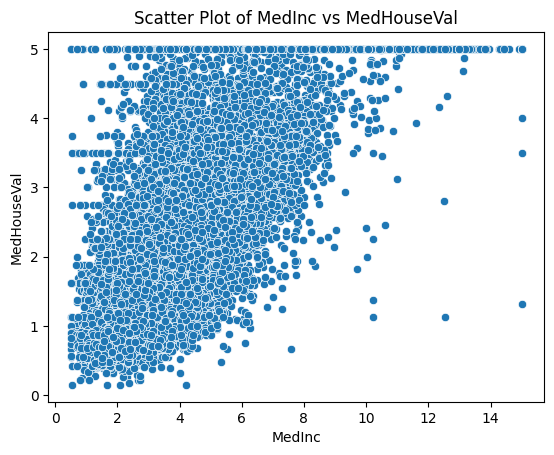

In [13]:
# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).

df['MedHouseVal'] = california.target

sns.scatterplot(x=df['MedInc'],y=df['MedHouseVal'])
plt.title('Scatter Plot of MedInc vs MedHouseVal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.show()

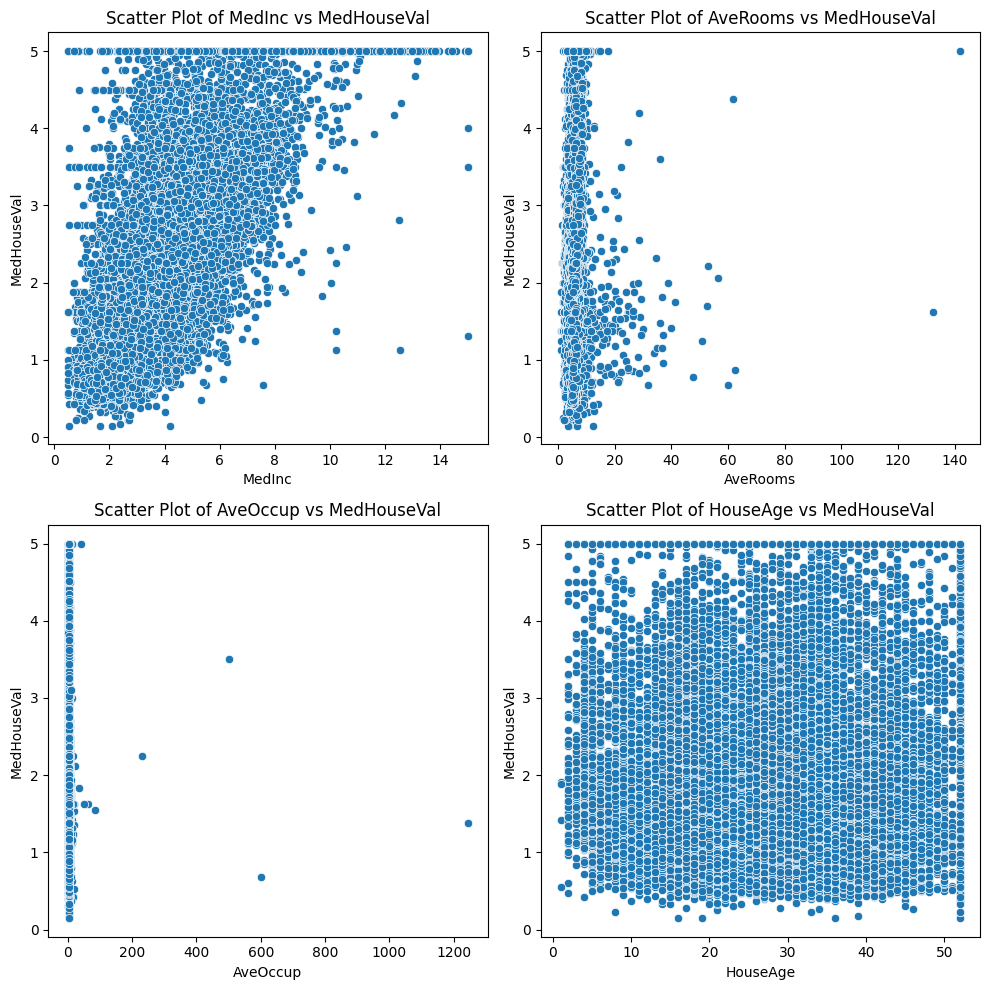

In [22]:
# TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.

def scatter_vs_target(features, target):
  plt.figure(figsize=(10, 10))

  for i, feature in enumerate(features):
    plt.subplot(2, 2, i +1)
    sns.scatterplot(x=df[feature], y=df['MedHouseVal'])
    plt.title(f'Scatter Plot of {feature} vs MedHouseVal')
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')

  plt.tight_layout()
  plt.show()


# TODO: Use the function to visualize the relationships between multiple features and the target variable.

features= ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
target= 'MedHouseVal'

scatter_vs_target(features, target)

**5. ML Model Training**

In [23]:
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [24]:
# TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

model = LinearRegression()


In [26]:
# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

model.fit(X_train, y_train)

LinearRegression()

**6. Model Evaluation**

In [31]:
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Predict on the test set and calculate the evaluation metrics:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# RMSE --> The models predictions are off by 0.75 ($75,000)
# R² --> The model explains 58% of the variance in the housing prices, which is not a good result.
# We can improve the model by adding more features or using other models like Random forests

Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
R-squared (R²): 0.58


**7. Model Prediction**

In [37]:
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])
predicted_value = model.predict(new_data)
print(f"Predicted Median House Value: ${predicted_value[0] * 100000:.2f}")



Predicted Median House Value: $154866.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
